### Setup

In [106]:
# General 
import pandas as pd
import numpy as np

# Dataset
talks_df = pd.read_csv('clean_data/ted_talks_clean.csv')
talks_df.head()

,title,author,views,likes,link,month,year
0,Climate action needs new frontline leadership,Ozawa Bineshi Albert,404000,12000,https://ted.com/talks/ozawa_bineshi_albert_cli...,December,2021
1,The dark history of the overthrow of Hawaii,Sydney Iaukea,214000,6400,https://ted.com/talks/sydney_iaukea_the_dark_h...,February,2022
2,How play can spark new ideas for your business,Martin Reeves,412000,12000,https://ted.com/talks/martin_reeves_how_play_c...,September,2021
3,Why is China appointing judges to combat clima...,James K. Thornton,427000,12000,https://ted.com/talks/james_k_thornton_why_is_...,October,2021
4,Cement's carbon problem — and 2 ways to fix it,Mahendra Singhi,2400,72,https://ted.com/talks/mahendra_singhi_cement_s...,October,2021


# Wordcloud con los titulos de las Charlas
Nos permite resaltar aquellas palabras que son más frecuentadas dentro de los títulos del dataset.


Graficado con:
- Matplotlib
- Wordcloud

In [107]:
# Librerias
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [108]:
# Palabras mas usadas
coment_words = ''
stopwords = set(STOPWORDS)

for val in talks_df.title:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    coment_words += ' '.join(tokens)+' '


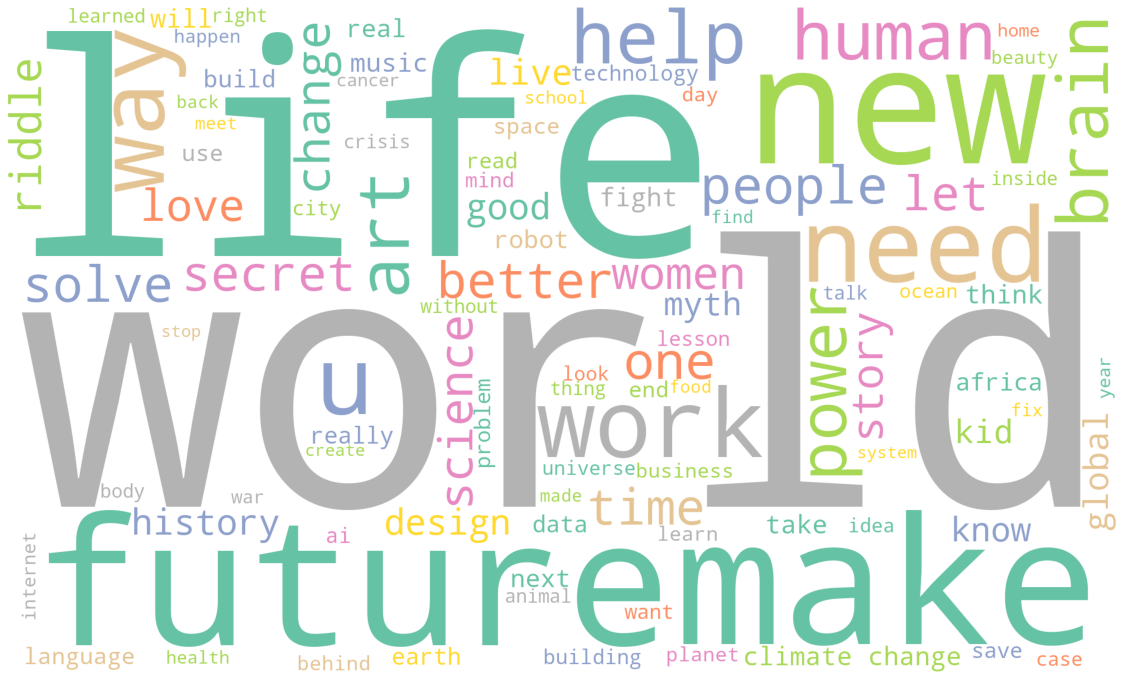

In [109]:
# Generar wordcloud
wordcloud = WordCloud(width = 2000, height = 1200,
                background_color ='white',
                stopwords = stopwords,
                colormap='Set2',
                max_words = 100,
                min_font_size = 0).generate(coment_words)

plt.figure(figsize = (20,20), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Top 10 Ted Talks por cantidad de likes

Los likes son una medida interna de la plataforma que permite valorar una charla si el usuario está registrado 

Graficado con:
- Matplotlib

In [110]:
# variables para graficar
titulo = talks_df.groupby('title')['likes'].sum().sort_values(ascending = False).head(10).index
likes = talks_df.groupby('title')['likes'].sum().sort_values(ascending = False).head(10)

# formato numeros con coma 
def formato_numeros(valor, index):
    if valor == 0:
        formato = '{:1.1f} '.format(valor)
    elif valor >= 1_000_000:
        formato = '{:1.1f} M'.format(valor * 0.000_001)
    else:
        formato = '{:1.0f} K'.format(valor * 0.001)
    return formato


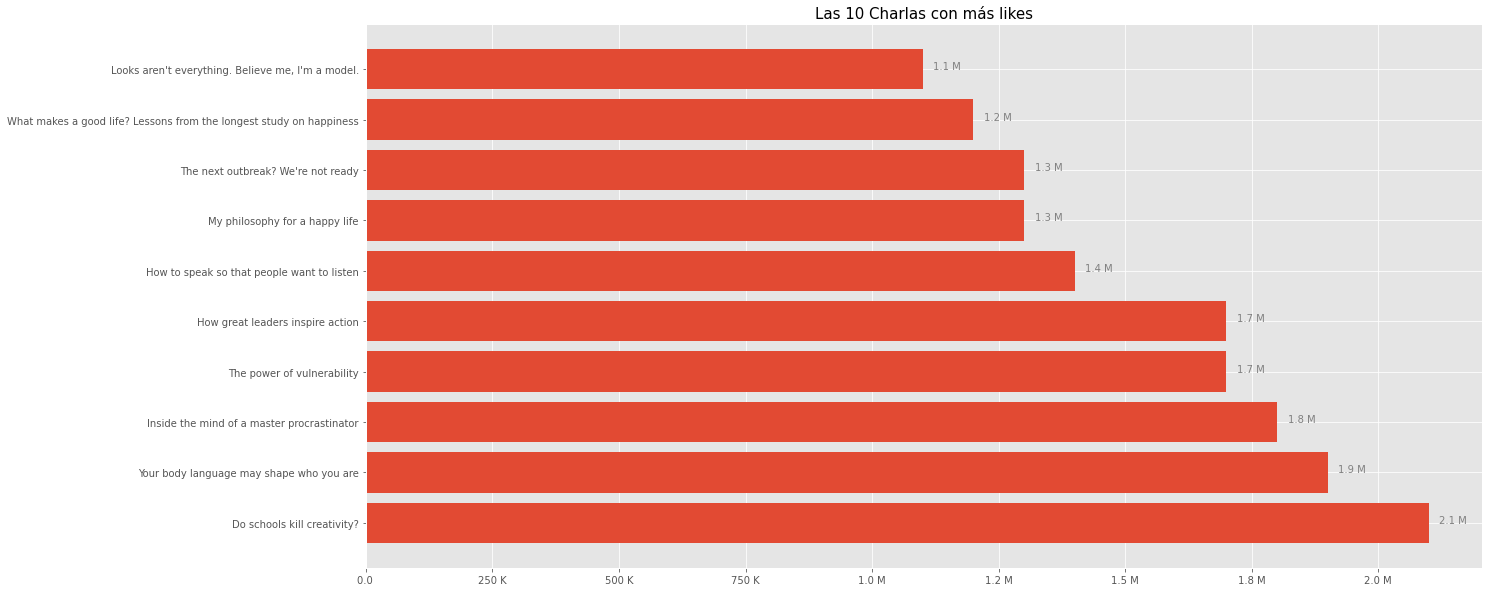

In [111]:
# Grafica
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(20,10))

ax.barh(titulo, likes)

step_value = likes.max()/20

ax.xaxis.set_major_formatter(formato_numeros)

ax.set_title('Las 10 Charlas con más likes', fontsize=15)

for i, v in enumerate(likes):
    ax.text(v+step_value/5, i, formato_numeros(v, i), color='gray')

plt.show()


# Top 10 Ted Talks por visitas
Las vistas son consideradas según la frecuencia del recurso, estas no requieren inscribirse y pueden incrementar gracias a un mismo usuario

Graficado con:
- Matplotlib

In [112]:
# Variables para graficar
title = talks_df.groupby('title')['views'].sum().sort_values(ascending = False).head(10).index
views = talks_df.groupby('title')['views'].sum().sort_values(ascending = False).head(10)

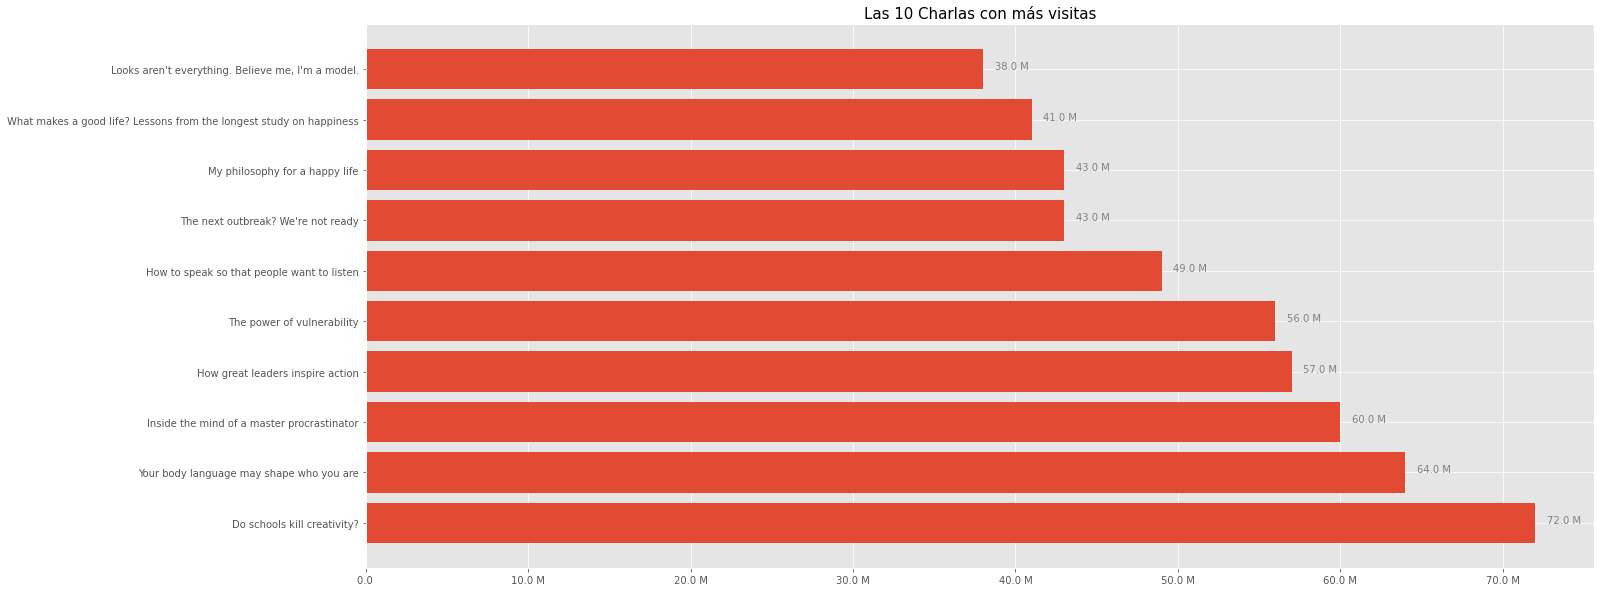

In [113]:
# Grafica
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(22,10))

ax.barh(title, views)

ax.xaxis.set_major_formatter(formato_numeros)

ax.set_title('Las 10 Charlas con más visitas', fontsize=15)

step_value=views.max()/20
for i, v in enumerate(views):
    ax.text(v+step_value/5, i, formato_numeros(v, i), color='gray')

plt.show()

# Histograma del numero de charlas por año

Graficado con:
- Matplotlib

KeyError: 0

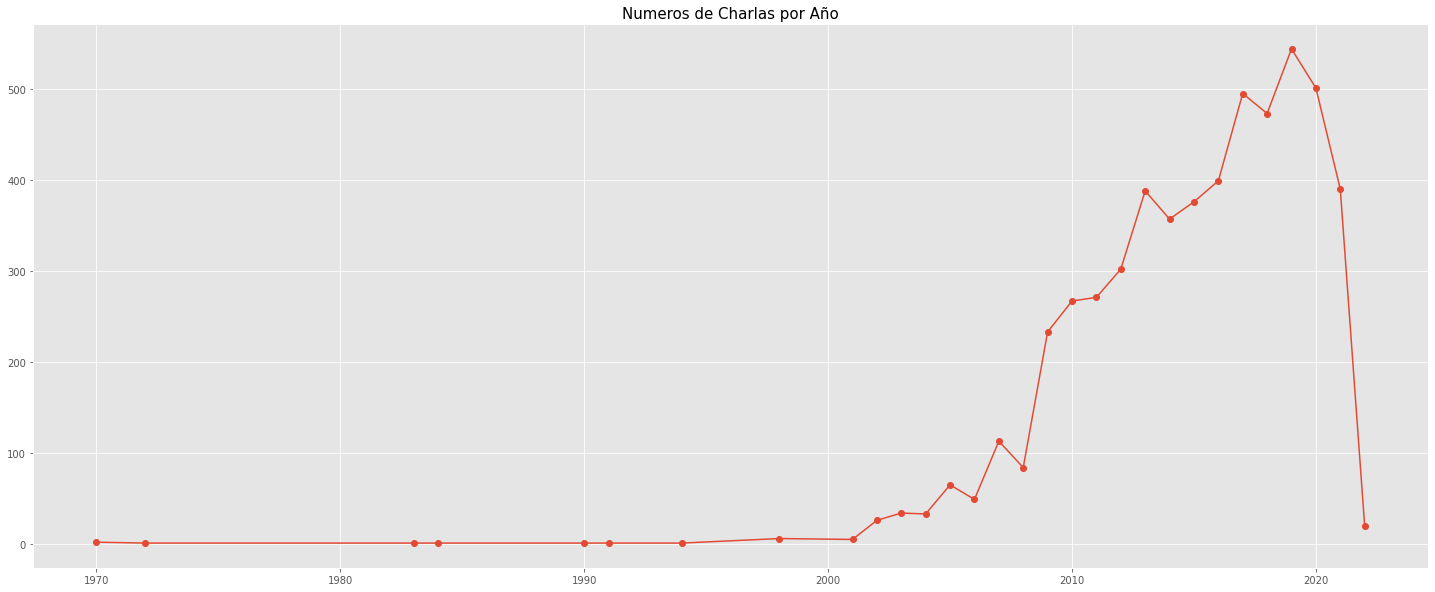

In [154]:
total = talks_df['year'].value_counts().sort_index(ascending=True)

plt.figure(figsize=(25,10))
plt.subplot()
plt.plot(total.index, total, 'o-')
plt.title('Numeros de Charlas por Año', fontsize=15)

step_value=total.max()/20

def valor_et(x, y):
    for i in range(1, len(total)+1):
        plt.text(i, y[i-1], y[i-1])
valor_et(total.index, total)
plt.show()